<a href="https://colab.research.google.com/github/june50232/tensorflow_jupyter/blob/master/Deep_Learning_MOOC_01_1_%E6%A8%99%E6%BA%96%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E5%81%9A%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98_%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[9487].shape

(28, 28)

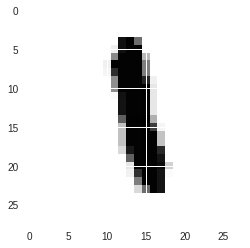

In [9]:
plt.imshow(x_train[9487], cmap='Greys')

In [10]:
y_train[9487]

1

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train,10)

In [0]:
y_test = np_utils.to_categorical(y_test,10)


In [15]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD


In [0]:
model = Sequential()

In [0]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [0]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [0]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model01.png')

In [24]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0834 - acc: 0.3261
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0658 - acc: 0.5919
Epoch 3/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0478 - acc: 0.7628
Epoch 4/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0343 - acc: 0.8436
Epoch 5/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0262 - acc: 0.8713
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0216 - acc: 0.8862
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0189 - acc: 0.8960
Epoch 8/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0170 - acc: 0.9042
Epoch 9/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.0157 - acc: 0.9099
Epoch 10/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0146 - a

In [0]:
from ipywidgets import interact_manual

In [0]:
predict = model.predict_classes(x_test)

In [0]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[測試編號])

In [29]:
interact_manual(test, 測試編號 = (0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [30]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 76us/step


In [31]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])


測試資料的 loss: 0.010584031482366845
測試資料正確率: 0.9345


In [0]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')
